## Task 1: Backpropagation Implementation for Binary Classification 

### 1) Dataset Creation

* Generate a synthetic dataset for binary classification using the make_blobs
function from the scikit-learn library.
* The dataset should have 1000 samples, 2 features, and their respective binary
labels.
* Split the dataset into train and test sets.
* Plot the training data using matplotlib.

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np

In [19]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Reshape y_train and y_test to have shape (800, 1) and (200, 1)
y_train = y_train.reshape(-1, 1) #To make (800,) to (800,1)
y_test = y_test.reshape(-1, 1)

In [20]:
X.shape


(1000, 2)

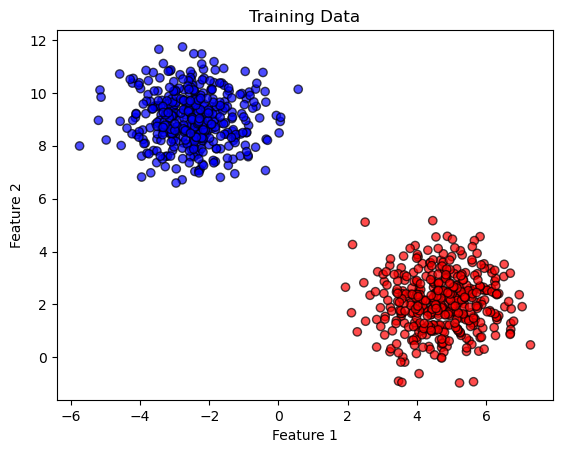

In [21]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolors='k', marker='o', alpha=0.7)
plt.title("Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### 2) Implement Backpropagation

* Create a small neural network from scratch with the following specifications:
    * Input layer with 2 neurons.
    * One hidden layer with 4 neurons using the sigmoid activation function.
    * Output layer with 1 neuron using the sigmoid activation function.
* Implement forward and backward propagation manually to train the network.
* Update the weights using gradient descent.
* Evaluate the model on the test set and print its accuracy

In [30]:
input_size = 2  # Number of input features
hidden_size = 4  # Number of neurons in the hidden layer
output_size = 1

In [31]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Mean Squared Error loss function
def mean_squared_error(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

In [32]:
np.random.seed(1)
w_i_h = np.random.randn(2, 4)  # generates a matrix of random values with dimensions (2, 4)
b_h = np.zeros((1, 4))  # Bias for hidden layer
w_h_o = np.random.randn(4, 1)  # Weights from hidden to output layer
b_o = np.zeros((1, 1))

learning_rate = 0.1
epochs = 10000


In [33]:
def forward(X):
    z1 = np.dot(X, w_i_h) + b_h
    output_h = sigmoid(z1)

    # Output layer
    z2 = np.dot(output_h, w_h_o) + b_o
    #print("Shape z2",z2.shape)
    output_o = sigmoid(z2)
    #print("Shape Out_o",output_o.shape)
    return output_h,output_o

In [34]:
def backward(X, y, output_h, output_o, learning_rate):

       # Backward propagation (gradient descent)
    # Output layer
    #print("y train shape", y_train.shape)
    error = y - output_o  # Compute the error (loss)

    #print("Error", error.shape)
    d_output_o = error * sigmoid_derivative(output_o)
    global w_h_o, b_o, w_i_h, b_h

    # Hidden layer
    d_output_h = d_output_o.dot(w_h_o.T) * sigmoid_derivative(output_h)

    # Update weights and biases
    w_h_o += output_h.T.dot(d_output_o) * learning_rate
    b_o += np.sum(d_output_o, axis=0, keepdims=True) * learning_rate

    w_i_h += X_train.T.dot(d_output_h) * learning_rate
    b_h += np.sum(d_output_h, axis=0, keepdims=True) * learning_rate


In [35]:


for epoch in range(epochs):
        # Forward pass
    output_h, output_o = forward(X_train)
    
    # Backward pass (gradient descent)
    backward(X_train, y_train, output_h, output_o, learning_rate)
    
    if epoch % 1000 == 0:
        loss = np.mean(np.square(error))  # Mean squared error
        print(f'Epoch {epoch}, Loss: {loss}')

 
output_h, output_o = forward(X_test)
predictions = output_o > 0.5  # Convert probabilities to binary output
accuracy = np.mean(predictions == y_test)  # Calculate accuracy

print(f'Accuracy: {accuracy * 100}%')

Epoch 0, Loss: 1.2604000136151371e-06
Epoch 1000, Loss: 1.2604000136151371e-06
Epoch 2000, Loss: 1.2604000136151371e-06
Epoch 3000, Loss: 1.2604000136151371e-06
Epoch 4000, Loss: 1.2604000136151371e-06
Epoch 5000, Loss: 1.2604000136151371e-06
Epoch 6000, Loss: 1.2604000136151371e-06
Epoch 7000, Loss: 1.2604000136151371e-06
Epoch 8000, Loss: 1.2604000136151371e-06
Epoch 9000, Loss: 1.2604000136151371e-06
Accuracy: 100.0%
